from imblean.over_sampling import SMOTE

# 데이터 정규화

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/workspace/Final_data.csv")

In [3]:
data

,Pass/Fail,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_6,Sensor_7,Sensor_8,Sensor_9,...,Sensor_573,Sensor_574,Sensor_575,Sensor_576,Sensor_577,Sensor_583,Sensor_585,Sensor_586,Sensor_587,Sensor_589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.613300,0.1242,1.5005,0.0162,...,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.36300,0.021458,0.016475,99.670066
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.343300,0.1247,1.4966,-0.0005,...,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.44470,0.009600,0.020100,208.204500
2,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.236700,0.1217,1.4882,-0.0124,...,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.05440,0.020200,0.014900,73.843200
3,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5031,-0.0031,...,0.2224,3.1776,0.0706,1.6597,10.9698,0.0260,5.21645,0.020200,0.014900,73.843200
4,-1,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5287,0.0167,...,0.3201,2.2598,0.0899,1.6679,13.7755,0.0189,3.82760,0.034200,0.015100,44.007700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,2988.39,2493.72,2206.4000,982.5452,1.1853,114.114275,0.1228,1.5279,-0.0094,...,0.2753,2.5960,0.0898,1.6997,13.8979,0.0154,3.09920,-0.000600,0.011800,0.000000
1563,1,3052.98,2515.51,2172.8111,969.3436,1.2736,102.736700,0.1243,1.4065,-0.0037,...,0.1416,1.8871,0.0396,1.0597,13.1807,0.0158,3.11060,0.030200,0.015900,52.701400
1564,1,2951.84,2477.13,2192.1889,1435.9611,2.3870,107.398900,0.1229,1.4613,-0.0027,...,0.2908,3.1198,0.0849,1.7170,12.6938,0.0118,2.37730,0.017800,0.012000,67.799400
1565,1,3173.18,2428.64,2209.4667,1556.3930,1.4884,95.115600,0.1206,1.6073,-0.0278,...,0.2456,2.4138,0.0849,1.3580,12.2013,0.0192,3.82890,0.028100,0.024700,88.152800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 373 entries, Pass/Fail to Sensor_589
dtypes: float64(372), int64(1)
memory usage: 4.5 MB


In [5]:
X = data.loc[:,'Sensor_0':'Sensor_589']
y = data.loc[:,'Pass/Fail']

In [6]:
X

,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_573,Sensor_574,Sensor_575,Sensor_576,Sensor_577,Sensor_583,Sensor_585,Sensor_586,Sensor_587,Sensor_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.613300,0.1242,1.5005,0.0162,-0.0034,...,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.36300,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.343300,0.1247,1.4966,-0.0005,-0.0148,...,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.44470,0.009600,0.020100,208.204500
2,2988.72,2479.90,2199.0333,909.7926,1.3204,104.236700,0.1217,1.4882,-0.0124,-0.0033,...,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.05440,0.020200,0.014900,73.843200
3,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5031,-0.0031,-0.0072,...,0.2224,3.1776,0.0706,1.6597,10.9698,0.0260,5.21645,0.020200,0.014900,73.843200
4,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5287,0.0167,0.0055,...,0.3201,2.2598,0.0899,1.6679,13.7755,0.0189,3.82760,0.034200,0.015100,44.007700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2988.39,2493.72,2206.4000,982.5452,1.1853,114.114275,0.1228,1.5279,-0.0094,0.0001,...,0.2753,2.5960,0.0898,1.6997,13.8979,0.0154,3.09920,-0.000600,0.011800,0.000000
1563,3052.98,2515.51,2172.8111,969.3436,1.2736,102.736700,0.1243,1.4065,-0.0037,-0.0058,...,0.1416,1.8871,0.0396,1.0597,13.1807,0.0158,3.11060,0.030200,0.015900,52.701400
1564,2951.84,2477.13,2192.1889,1435.9611,2.3870,107.398900,0.1229,1.4613,-0.0027,-0.0039,...,0.2908,3.1198,0.0849,1.7170,12.6938,0.0118,2.37730,0.017800,0.012000,67.799400
1565,3173.18,2428.64,2209.4667,1556.3930,1.4884,95.115600,0.1206,1.6073,-0.0278,-0.0057,...,0.2456,2.4138,0.0849,1.3580,12.2013,0.0192,3.82890,0.028100,0.024700,88.152800


In [7]:
MMS = MinMaxScaler()
X = MMS.fit_transform(X)
X = pd.DataFrame(X)

In [78]:
feature_name = list(pd.DataFrame(X).columns)

In [79]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                     reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1))

In [80]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

18 selected features


In [81]:
df_lgb = pd.DataFrame(X, columns=embeded_lgb_feature)
X_lgb = df_lgb.copy()

In [82]:
# 최종 독립변수 데이터 셋(정규화 완료)
X_lgb.head()

,0,18,19,52,64,78,83,102,123,135,138,148,191,215,223,309,347,370
0,0.502350,0.575829,0.647575,0.206019,0.646214,0.438303,0.895260,0.580954,0.753115,0.727395,0.576779,0.236243,0.262887,0.260059,0.191795,0.053242,0.712144,0.328587
1,0.639319,0.568336,0.419030,0.249727,0.518058,0.329378,0.280281,0.571431,0.045950,0.828989,0.428964,0.156327,0.438144,0.251018,0.175756,0.194921,0.357321,0.418317
2,0.413198,0.559427,0.451235,0.504854,0.117282,0.246592,0.295787,0.647614,0.276480,0.588560,0.340574,0.350508,0.530928,0.327182,0.478543,0.000000,1.000000,0.289604
3,0.505117,0.556763,0.441720,0.023713,0.133592,0.579148,0.703920,0.476183,0.220405,0.546551,0.291635,0.568174,0.484536,0.657856,0.404450,0.750039,0.429285,0.289604
4,0.323498,0.363016,0.674840,0.504854,0.702136,0.108431,0.577823,0.571431,0.708723,0.415909,0.514357,0.638626,0.443299,0.596255,0.418226,0.725223,0.274863,0.294554


In [83]:
data_nm = pd.concat([X_lgb,y], axis=1)

In [84]:
data_nm.columns

Index([          0,          18,          19,          52,          64,
                78,          83,         102,         123,         135,
               138,         148,         191,         215,         223,
               309,         347,         370, 'Pass/Fail'],
      dtype='object')

In [18]:
y = data_nm['Pass/Fail']
X = data_nm.drop(['Pass/Fail'],axis=1)

In [19]:
Final_data_nomalization = data_nm
Final_data_nomalization.to_csv('Final_data_nomalization.csv', index = False)

- 정규화 후 55개 추출하여 저장 완료

<Axes: ylabel='Pass/Fail'>

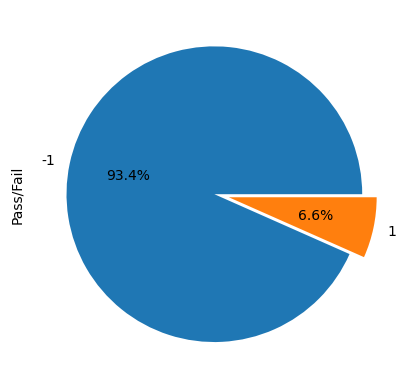

In [20]:
# PASS/ FAIL 변수 확인
data_nm['Pass/Fail'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%')

In [25]:
y.value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [27]:
# SMOTE(오버샘플링) 통해서 불균형한 데이터 보정
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

SM = SMOTE()
X_train, y_train = SM.fit_resample(X, y)


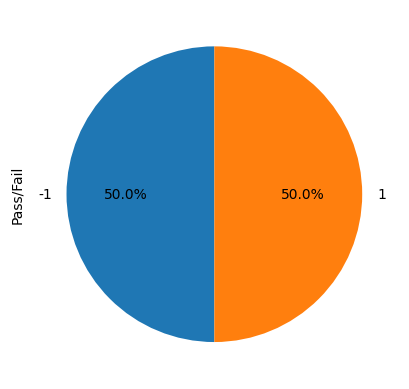

In [39]:
y_train.value_counts().plot.pie(startangle=90,autopct='%.1f%%')
plt.show()

In [29]:
X_train.shape

(2926, 55)

In [41]:
Final_data_SMOTE = pd.concat([X_train,y_train], axis=1)
Final_data_SMOTE.to_csv("Final_data_SMOTE.csv", index=False)

In [70]:
# XGboost를 이용한 혼동행렬 시각화
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,y)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

ValueError: Found input variables with inconsistent numbers of samples: [2926, 1567]

In [75]:
print(y.shape)

(1567,)


In [76]:
print(y_train.shape)

(2926,)


In [54]:
# XGboost 모델에 맞게 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

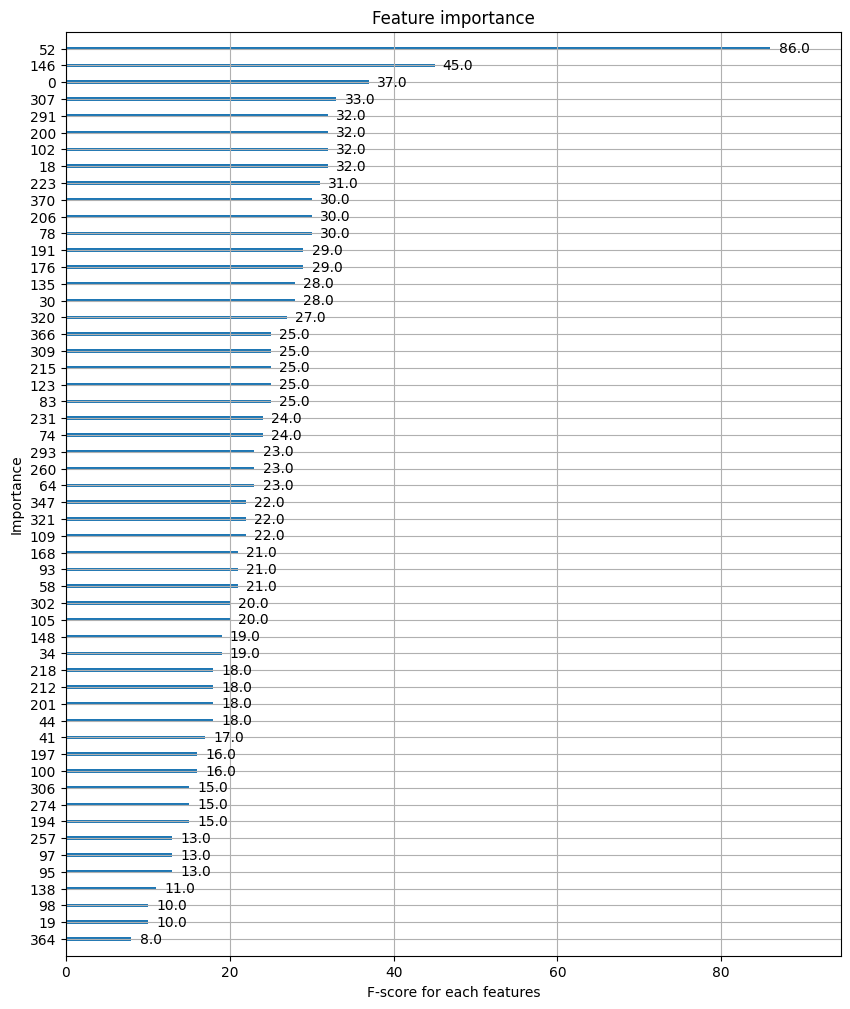

In [59]:
# XGboost를 이용한 중요 피쳐 시각화
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

xgb_model = model.fit(X_train, y_train)

fig, dax = plt.subplots(figsize=(10,12))
xgb.plot_importance(xgb_model, ax=ax)

plt.xlabel('F-score for each features')
plt.ylabel('Importance')
plt.show()

In [77]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)